In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import seaborn as sns
# 결측치를 시각화 하기 위해 필요
import missingno as msno

# 파이썬 경고 문을 보이지 않게 해줍니다
import warnings
warnings.filterwarnings("ignore")

C:\Users\ghdau\AppData\Roaming\Python\Python38\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# 코랩 실행시 한글 폰트 문제 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [3]:
# 한글 폰트 설정
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font)

In [4]:
# 주피터 노트북 자동완성 기능 위해 필요
%config Completer.use_jedi = False

![부기](./images/202103150945381264_m.jpg)

## 글로벌 시대에 맞이한 우리,,, 
## 2030 부산 월드 엑스포,,,
## 우리 지역에는 다문화 인구가 어느 정도 있을까???
### 부산시 공공데이터를 통해 획득한 다문화 인구 데이터를 이용하여
### 부산시 구별로 다문화 인구와 관련된 데이터를 분석할려고 합니다!!
### 출처 공공데이터포털 https://www.data.go.kr/data/15054868/fileData.do

## 데이터에서 뽑을 수 있어 보이는 인사이트
*****
### 성별에 따른 분석   
### 결혼이민자에 따른 분석   
### 국적을 취득 유무에 따른 다문화 인구 분석
### 자녀를 보유한 다문화 인구 분석

## 1. 성별에 따른 분석

In [5]:
# # 코랩용
# df = pd.read_csv('/content/부산광역시_다문화가족현황_20211101.csv' , encoding='CP949')
# df

In [6]:
# 로컬용
df = pd.read_csv("./data/부산광역시_다문화가족현황_20211101.csv" , encoding='CP949')
df

,구군명,총계,총계(남),총계(여),결혼이민자,결혼이민자(남),결혼이민자(여),결혼이민자_국적미취득자,결혼이민자_국적미취득자(남),결혼이민자_국적미취득자(여),결혼이민자_국적취득자,결혼이민자_국적취득자(남),결혼이민자_국적취득자(여),자녀,자녀(남),자녀(여),Unnamed: 16
0,중구,405,130,275,255,50,205,138,22,116,117,28,89,150,80,70,NaN
1,서구,827,249,578,463,65,398,227,29,198,236,36,200,364,184,180,NaN
2,동구,942,309,633,539,98,441,252,43,209,287,55,232,403,211,192,NaN
3,영도구,1073,319,754,554,59,495,253,30,223,301,29,272,519,260,259,NaN
4,부산진구,2383,734,1649,1262,160,1102,673,101,572,589,59,530,1121,574,547,NaN
5,동래구,1344,414,930,685,87,598,366,56,310,319,31,288,659,327,332,NaN
6,남구,1856,590,1266,909,131,778,491,87,404,418,44,374,947,459,488,NaN
7,북구,2197,688,1509,1087,118,969,499,60,439,588,58,530,1110,570,540,NaN
8,해운대구,2839,1071,1768,1450,355,1095,875,274,601,575,81,494,1389,716,673,NaN
9,사하구,3225,971,2254,1721,204,1517,845,114,731,876,90,786,1504,767,737,NaN


### 불 필요해 보이는 열을 제거 합니다

In [7]:
df.drop('Unnamed: 16', axis=1, inplace=True)

In [8]:
df.columns

Index(['구군명', '총계', '총계(남)', '총계(여)', '결혼이민자', '결혼이민자(남)', '결혼이민자(여)',
       '결혼이민자_국적미취득자', '결혼이민자_국적미취득자(남)', '결혼이민자_국적미취득자(여)', '결혼이민자_국적취득자',
       '결혼이민자_국적취득자(남)', '결혼이민자_국적취득자(여)', '자녀', '자녀(남)', '자녀(여)'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   구군명              16 non-null     object
 1   총계               16 non-null     int64 
 2   총계(남)            16 non-null     int64 
 3   총계(여)            16 non-null     int64 
 4   결혼이민자            16 non-null     int64 
 5   결혼이민자(남)         16 non-null     int64 
 6   결혼이민자(여)         16 non-null     int64 
 7   결혼이민자_국적미취득자     16 non-null     int64 
 8   결혼이민자_국적미취득자(남)  16 non-null     int64 
 9   결혼이민자_국적미취득자(여)  16 non-null     int64 
 10  결혼이민자_국적취득자      16 non-null     int64 
 11  결혼이민자_국적취득자(남)   16 non-null     int64 
 12  결혼이민자_국적취득자(여)   16 non-null     int64 
 13  자녀               16 non-null     int64 
 14  자녀(남)            16 non-null     int64 
 15  자녀(여)            16 non-null     int64 
dtypes: int64(15), object(1)
memory usage: 2.1+ KB


### 총계에서 남성과 여성이 2배가 차이남을 알 수 있습니다

In [10]:
df.describe()

,총계,총계(남),총계(여),결혼이민자,결혼이민자(남),결혼이민자(여),결혼이민자_국적미취득자,결혼이민자_국적미취득자(남),결혼이민자_국적미취득자(여),결혼이민자_국적취득자,결혼이민자_국적취득자(남),결혼이민자_국적취득자(여),자녀,자녀(남),자녀(여)
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,1675.500000,536.687500,1138.812500,877.500000,134.500000,743.000000,458.750000,84.625000,374.1250,418.750000,49.875000,368.875000,798.000000,402.187500,395.812500
std,813.602442,263.812741,557.268364,423.140481,74.955987,366.301515,221.241497,60.886643,173.9624,212.746328,18.380696,197.151676,393.724608,199.920724,194.513142
min,405.000000,130.000000,275.000000,255.000000,50.000000,205.000000,138.000000,22.000000,116.0000,117.000000,28.000000,89.000000,150.000000,80.000000,70.000000
25%,1109.000000,354.250000,754.750000,553.000000,85.000000,489.000000,289.750000,47.500000,245.5000,279.750000,34.750000,228.500000,558.000000,278.750000,277.750000
50%,1440.500000,467.000000,973.500000,752.500000,125.500000,631.500000,412.500000,74.500000,327.0000,349.500000,46.500000,309.500000,688.000000,343.500000,346.500000
75%,2243.500000,699.500000,1544.000000,1130.750000,160.750000,1000.500000,542.500000,104.250000,472.2500,578.250000,58.250000,503.000000,1112.750000,571.000000,541.750000
max,3225.000000,1071.000000,2254.000000,1721.000000,355.000000,1517.000000,875.000000,274.000000,731.0000,876.000000,90.000000,786.000000,1504.000000,767.000000,737.000000


### 결측값이 보이지 않습니다

<Axes: >

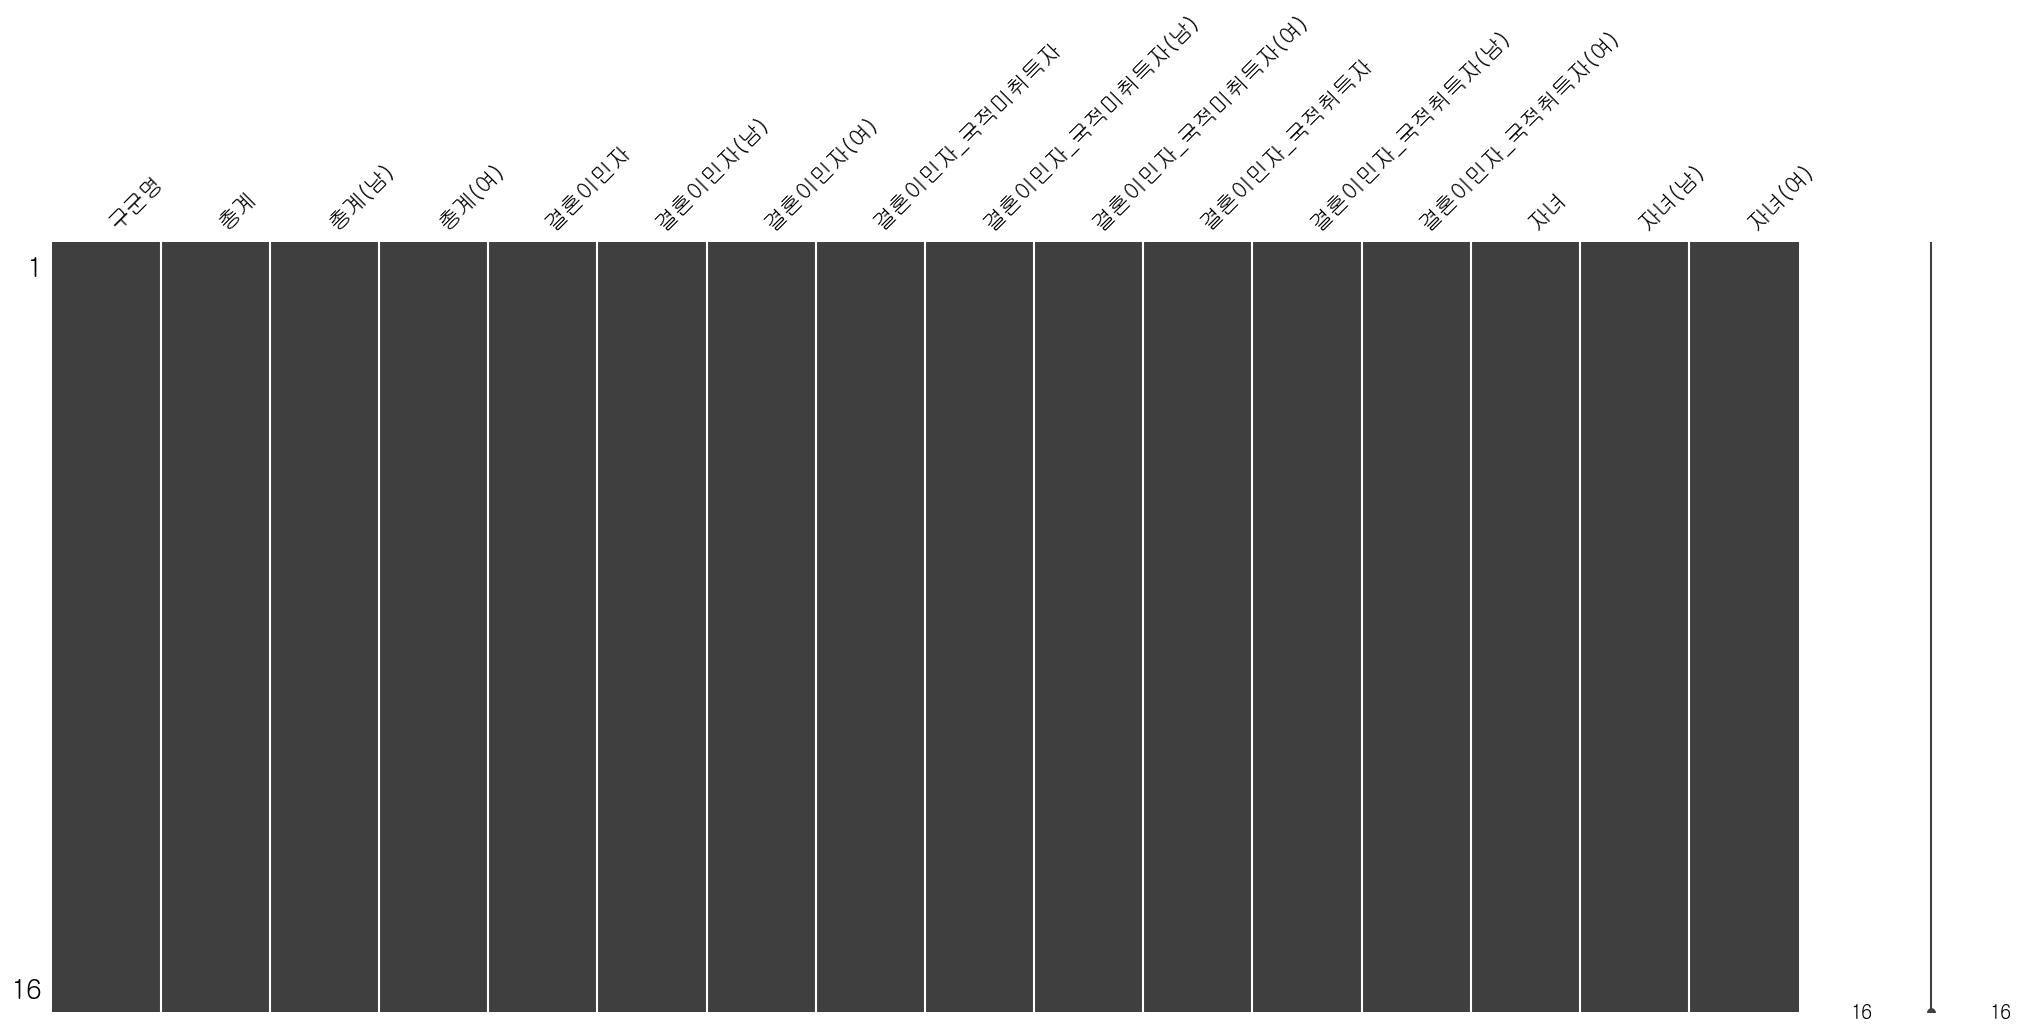

In [11]:
msno.matrix(df)

In [12]:
df.isnull().sum()

구군명                0
총계                 0
총계(남)              0
총계(여)              0
결혼이민자              0
결혼이민자(남)           0
결혼이민자(여)           0
결혼이민자_국적미취득자       0
결혼이민자_국적미취득자(남)    0
결혼이민자_국적미취득자(여)    0
결혼이민자_국적취득자        0
결혼이민자_국적취득자(남)     0
결혼이민자_국적취득자(여)     0
자녀                 0
자녀(남)              0
자녀(여)              0
dtype: int64

### 각 구별로 데이터를 분리하여 새로운 데이터 프레임을 만들어줍니다

In [13]:
df_by_region_total = df.groupby('구군명')[['총계']].sum().sort_values(by = ['총계'],ascending= False)
df_by_region_man = df.groupby('구군명')[['총계(남)']].sum().sort_values('총계(남)',ascending= False)
df_by_region_girl = df.groupby('구군명')[['총계(여)']].sum().sort_values('총계(여)',ascending= False)
df_by_region_total

,총계
구군명,
사하구,3225
사상구,2868
해운대구,2839
부산진구,2383
북구,2197
남구,1856
기장군,1587
금정구,1485
강서구,1396


## 1.1 각 구 별 다문화 주민 분석 

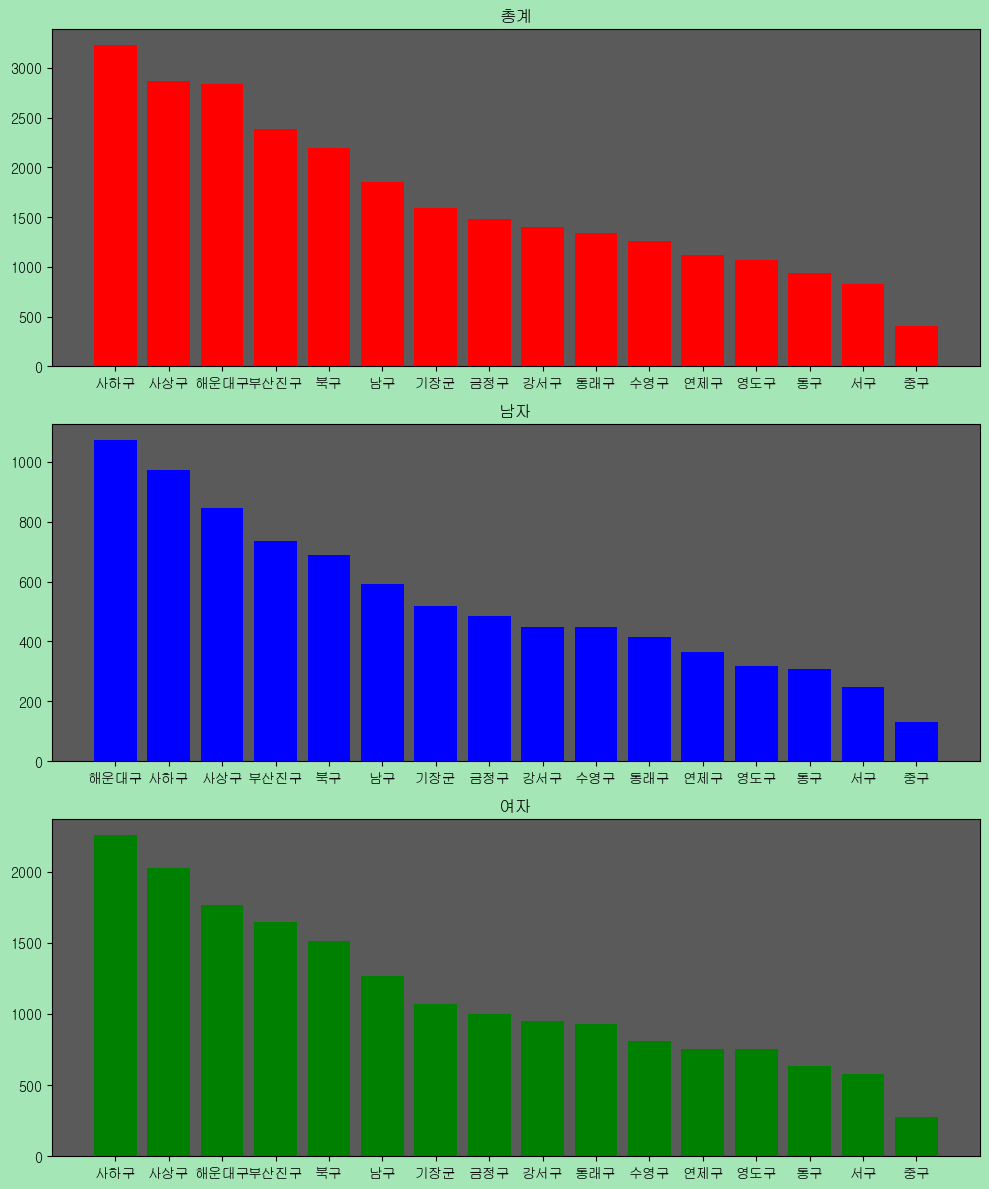

In [14]:
# y축 데이터
y1 = df_by_region_total['총계']
y2 = df_by_region_man['총계(남)']
y3 = df_by_region_girl['총계(여)']
# x축 인덱스 데이터
index1 = df_by_region_total.index.tolist()
index2 = df_by_region_man.index.tolist()
index3 = df_by_region_girl.index.tolist()

# 그래프 배경 색상
colors = ['red','blue','green']

fig, axs = plt.subplots(3, 1, figsize=(10, 12))  # 3개의 서브플롯을 1열로 배치
fig.patch.set_facecolor('#a5e6b6') # 전체 그래프 배경색 설정


for ax in axs:
    ax.set_facecolor('#5a5a5a')  # 각 서브플롯의 배경색 설정

# 첫 번째 서브플롯: 총계
axs[0].bar(index1, y1,color=colors[0])
axs[0].set_title('총계')

# 두 번째 서브플롯: 총계(남)
axs[1].bar(index2, y2,color=colors[1])
axs[1].set_title('남자')

# 세 번째 서브플롯: 총계(여)
axs[2].bar(index3, y3,color=colors[2])
axs[2].set_title('여자')

plt.tight_layout()  # 서브플롯 간 간격 조절
plt.show() # 그래프 표시

### 각 구에서 여성 비율이 남성 보다 2배 이상 많아 보이고
### 중구에서 가장 작은 비율이 보입니다
### 사하구에서 가장 많은 다문화 인구가 보이지만
### 남성들은 주로 해운대에 거주하고 있는것으로 보입니다

In [15]:
# melt를 이용하여 세로가 긴 데이터를 만들어 줍니다
df.melt(id_vars='구군명',value_vars=['총계(남)', '총계(여)'],var_name='성별',value_name='인구수')

,구군명,성별,인구수
0,중구,총계(남),130
1,서구,총계(남),249
2,동구,총계(남),309
3,영도구,총계(남),319
4,부산진구,총계(남),734
5,동래구,총계(남),414
6,남구,총계(남),590
7,북구,총계(남),688
8,해운대구,총계(남),1071
9,사하구,총계(남),971


## 1.2 FacetGrid를 통한 각 구별 다문화 인구 분석

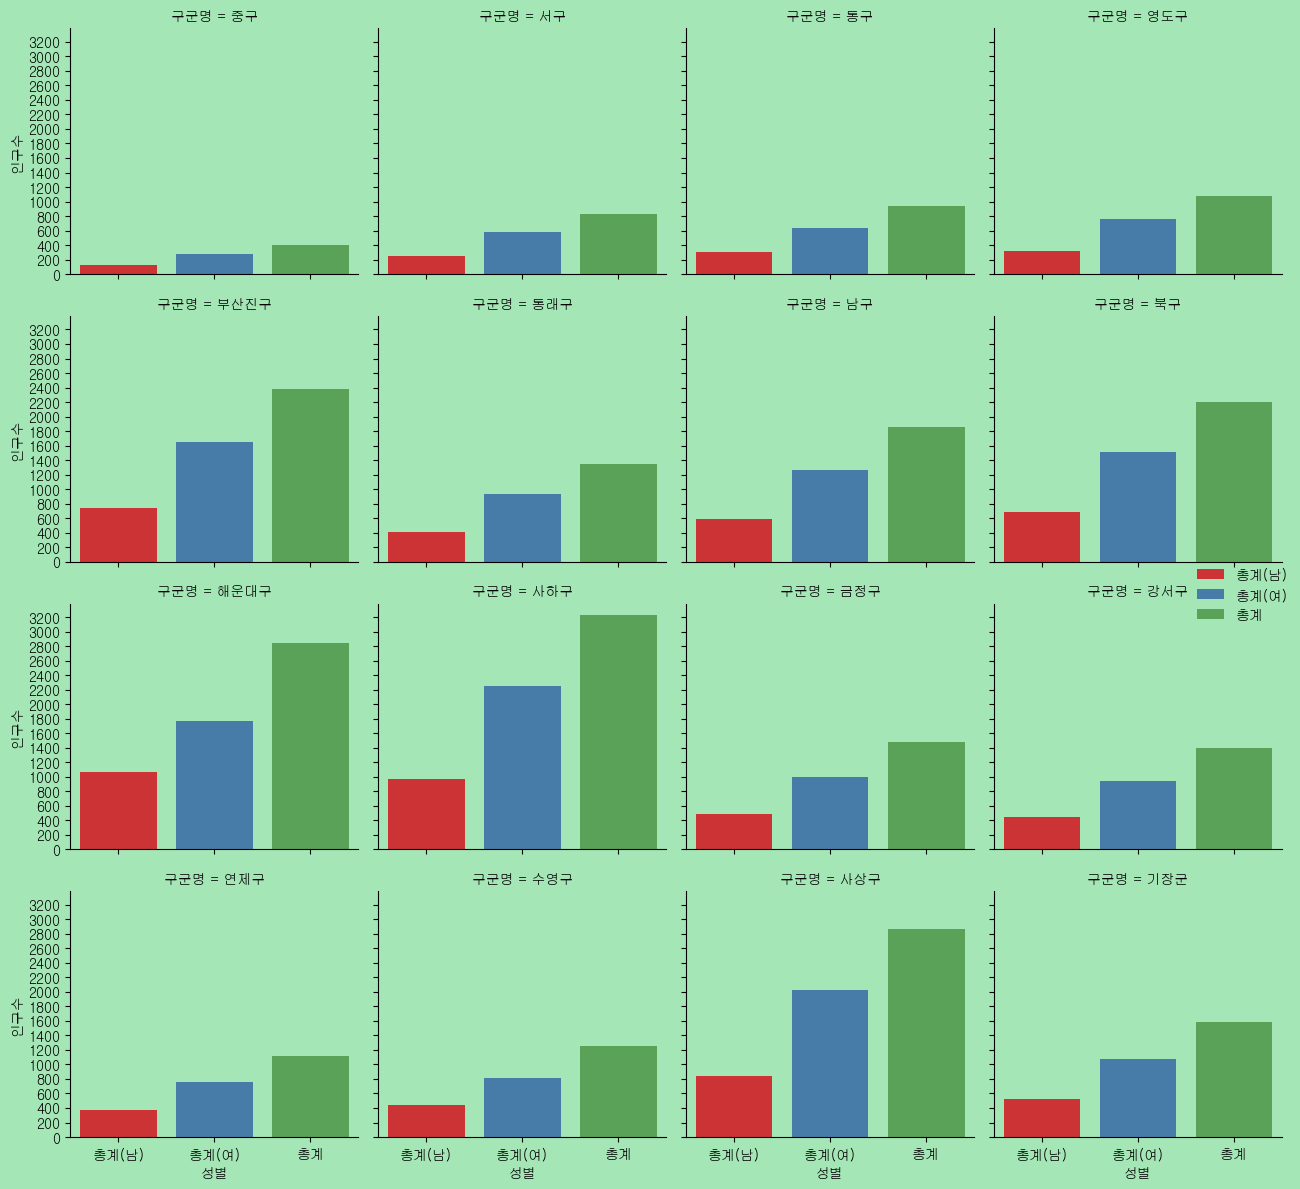

In [16]:
df_by_region = df.melt(id_vars='구군명',value_vars=['총계(남)', '총계(여)','총계'],var_name='성별',value_name='인구수')
max_num = df_by_region['인구수'].max() # y축 최대값을 위함

# 행을 구군명으로 4개씩 구분하여 막대 그래프를 그립니다
g = sns.FacetGrid(col ='구군명',data=df_by_region, col_wrap=4)
g.map_dataframe(sns.barplot, x='성별', y='인구수', hue='성별', palette='Set1', dodge=False)

# 전체 그래프 색상 설정
fig = g.fig
fig.patch.set_facecolor('#a5e6b6')

for ax in g.axes.flat:
    # 각 그래프 색상 설정
    ax.patch.set_facecolor('#a5e6b6')
    ax.set_yticks(range(0, max_num, 200))  # 원하는 y축 범위로 설정

# 범례 표시
g.add_legend()

plt.tight_layout()
plt.show()

### 사하구 , 해운대구 , 사상구, 부산진구, 
### 북구에서 많이 거주하고 있는 반면,   
### 의외지만 부산역과 차이나타운 텍사스거리 ,가 있는 동구를 포함하여   
### 중구 , 서구 , 영도구는 적게 거주하는걸로 보입니다

###  파이 차트를 위한 성별 비율 값을 구해줍니다

In [17]:
# 구 별로 순서대로 데이터를 다시 정리해줍니다
df_by_region2 = df_by_region.sort_values('구군명')

columns = df_by_region2['구군명'].unique().tolist()
ratio_of_popuration = []

# 각 구 별로 비율 값을 계산 해줍니다
for column in columns:
  total = df_by_region2[(df_by_region2['구군명'] == column)  & (df_by_region2['성별'] == '총계')]['인구수'].sum()
  man = df_by_region2[(df_by_region2['구군명'] == column) & (df_by_region2['성별'] == '총계(남)')]['인구수']
  girl = df_by_region2[(df_by_region2['구군명'] == column) & (df_by_region2['성별'] == '총계(여)')]['인구수']
  man_ratio = man / total
  woman_ratio = girl / total

  ratio_of_popuration.append(man_ratio.values[0])
  ratio_of_popuration.append(woman_ratio.values[0])


## 1.3 파이 차트를 이용하여 각 구 별 인구 비율을 분석합니다

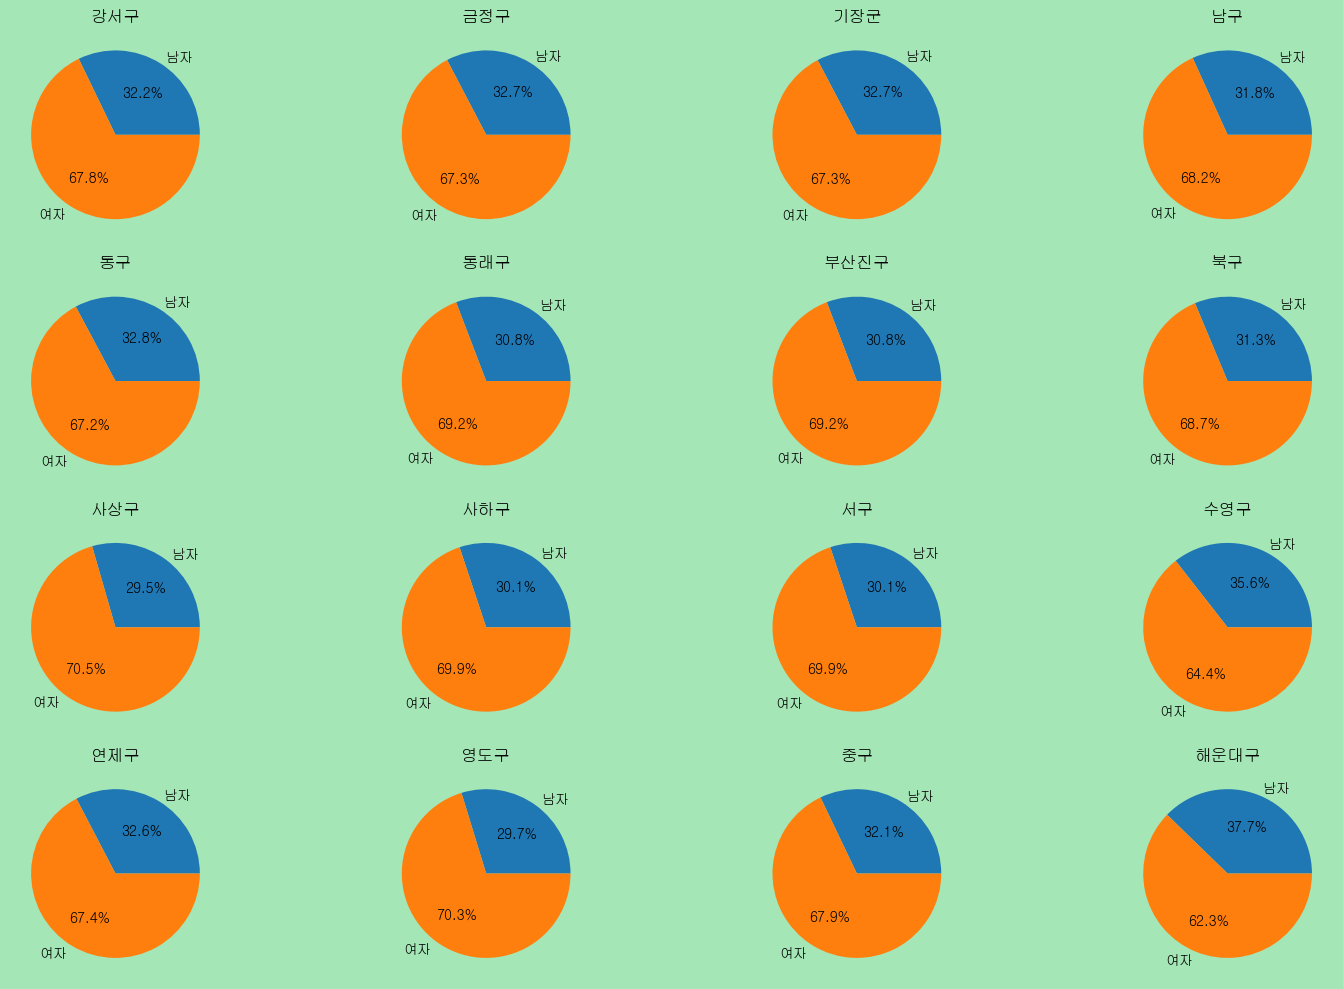

In [18]:
columns = df_by_region2['구군명'].unique().tolist()
labels = ['남자','여자']
num = 0
# 4,4 그래프 행에 4개씩 그래프를 그려줍니다
fig, axes = plt.subplots(nrows=(len(columns)) // 4, ncols=4, figsize=(16, 10))
fig.patch.set_facecolor('#a5e6b6')

for idx, column in enumerate(columns):
  ax = axes[idx // 4, idx % 4]

  ax.pie(ratio_of_popuration[num:num+2],labels=labels,autopct='%.1f%%') # 차트에 숫자 표시
  ax.set_title(column)

  num += 2

plt.tight_layout()
plt.show()

### 성별 비율이 2배이상 차이 남을 볼 수 있습니다.
### 거의 모든 구가 남성 30%대 여성은 60% 비율을 알 수 있습니다

## 1.4 각 구별 다문화 인구 성별 비율과 값을 분석 합니다

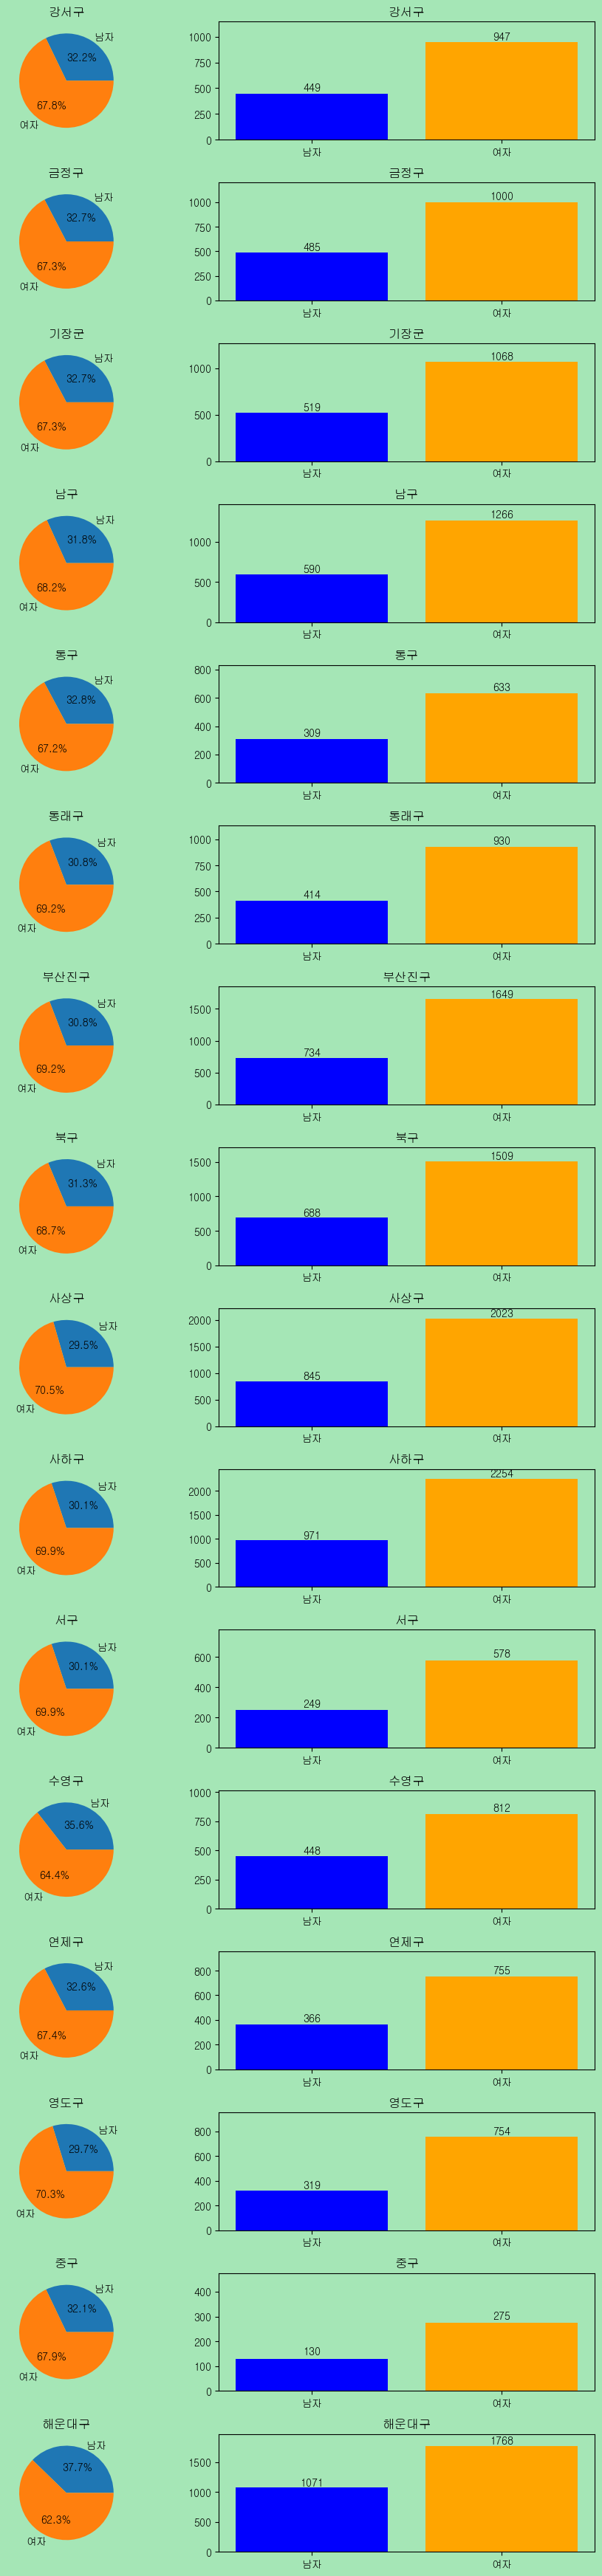

In [19]:
columns = df_by_region2['구군명'].unique().tolist()
labels = ['남자', '여자']
colors = ['blue','orange']

#  len(columns) * 2 크기의 서브 플롯을 만듭니다
fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(10,35))
# 그래프 배경색 설정
fig.patch.set_facecolor('#a5e6b6')

for idx, column in enumerate(columns):
    value_by_gender = []
    
    #막대 그래프 y값 범위
    num = df_by_region2[(df_by_region2['구군명'] == column)]['인구수'].nlargest(2).values[1] # 총계를 제외한 값중 큰 값
    # 막대 그래프 값을 더 해줍니다
    man = df_by_region2[(df_by_region2['구군명'] == column) & (df_by_region2['성별'] == '총계(남)')]['인구수'].values[0]
    girl = df_by_region2[(df_by_region2['구군명'] == column) & (df_by_region2['성별'] == '총계(여)')]['인구수'].values[0]
    value_by_gender.append(man)
    value_by_gender.append(girl)
    
    # 파이차트 그리기
    ax_pie = axes[idx, 0]
    ax_pie.patch.set_facecolor('#a5e6b6')
    ax_pie.pie(ratio_of_popuration[idx * 2:idx * 2 + 2], labels=labels, autopct='%.1f%%')
    ax_pie.set_title(column) # 차트 제목 설정

    # 막대 그래프 그리기
    ax_bar = axes[idx, 1]
    ax_bar.patch.set_facecolor('#a5e6b6')
    x = np.arange(len(labels)) 

    ax_bar.bar(x, value_by_gender,color=colors)
    ax_bar.set_xticks(x) # x축 위치
    ax_bar.set_xticklabels(labels) # x축 표시 레이블
    ax_bar.set_ylim(0, num + 200 ,100) # y값 범위 설정
    ax_bar.set_title(column) # 그래프 제목 설정
    
    # 막대 그래프에서 각 그래프 위에 값을 표시 해줍니다
    for i, v in enumerate(value_by_gender):
        ax_bar.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)
    
plt.tight_layout()
plt.show()

### 각 구별 비율과 값을 나타내 보았습니다!!!

## 다음 시도로는 각 구별 주민 인구와   다문화 인구 수 가 비례하는지도 조사 해 볼 수 있을 것 같습니다

# 2 결혼 이민자 국적 취득 여부

## 2.1 필요한 컬럼을 선택한후 구별로 오름차순 해줍니다

In [38]:
df.columns.str.contains('결혼')

array([False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False])

In [37]:
df.columns[df.columns.str.contains('결혼')]

Index(['결혼이민자', '결혼이민자(남)', '결혼이민자(여)', '결혼이민자_국적미취득자', '결혼이민자_국적미취득자(남)',
       '결혼이민자_국적미취득자(여)', '결혼이민자_국적취득자', '결혼이민자_국적취득자(남)', '결혼이민자_국적취득자(여)'],
      dtype='object')

In [54]:
df_by_immigration = df[(df.columns[df.columns.str.contains('결혼')])]
df_by_immigration['구군명'] = df['구군명']
df_by_immigration.set_index(keys='구군명',inplace = True)
df_by_immigration.sort_index()

,결혼이민자,결혼이민자(남),결혼이민자(여),결혼이민자_국적미취득자,결혼이민자_국적미취득자(남),결혼이민자_국적미취득자(여),결혼이민자_국적취득자,결혼이민자_국적취득자(남),결혼이민자_국적취득자(여)
구군명,,,,,,,,,
강서구,715,126,589,409,84,325,306,42,264
금정구,790,125,665,397,68,329,393,57,336
기장군,835,130,705,455,81,374,380,49,331
남구,909,131,778,491,87,404,418,44,374
동구,539,98,441,252,43,209,287,55,232
동래구,685,87,598,366,56,310,319,31,288
부산진구,1262,160,1102,673,101,572,589,59,530
북구,1087,118,969,499,60,439,588,58,530
사상구,1551,202,1349,742,136,606,809,66,743
